# Deep Learning Tutorial 05: RNN - Time Series Prediction with MLP (Ch24)

from Deep Learning with Python by Jason Brownlee (2016)
[e-book](https://machinelearningmastery.com/deep-learning-with-python/)
[요약](http://machinelearningmastery.com/introduction-python-deep-learning-library-keras/)

# Chapter 24 Time Series Prediction with Multilayer Perceptrons

## 24.1 Problem Description: Time Series Prediction

국제선 승객수 예측 문제 (from [DataMarket](https://goo.gl/fpwEXk))
- 1949.01 ~ 1960.12 (144개월(12년))
- 1,000명 단위
- 다운로드: [DataMarket](https://goo.gl/fpwEXk) 웹페이지의 Export 탭에서 CSV(,)를 선택해 다운로드한다.

In [1]:
!ls -al ~/Downloads/

total 4444252
drwxr-xr-x  2 kikim kikim       4096  8월  2 10:53 .
drwxr-xr-x 46 kikim kikim       4096  7월 31 17:21 ..
-rw-rw-r--  1 kikim kikim    1418820  4월 23 16:32 4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
-rw-rw-r--  1 kikim kikim  411562823  5월 29 10:09 Anaconda2-4.0.0-Linux-x86_64.sh
-rw-rw-r--  1 kikim kikim 2013382446  2월 29 00:36 cuda-repo-ubuntu1404-7-5-local_7.5-18_amd64.deb
-rw-rw-r--  1 kikim kikim 1831460088  5월 29 12:27 cuda-repo-ubuntu1604-8-0-rc_8.0.27-1_amd64.deb
-rw-rw-r--  1 kikim kikim   79334059  5월 29 10:34 cudnn-7.5-linux-x64-v5.0-ga.tgz
-rwxrwxr-x  1 kikim kikim   47906916  3월  1 11:33 google-chrome-stable_current_amd64.deb
-rw-rw-r--  1 kikim kikim       2334  8월  2 10:53 international-airline-passengers.csv
-rw-rw-r--  1 kikim kikim       4551  7월  7 00:20 iris.csv
-rw-rw-r--  1 kikim kikim   33054872  5월 14 11:13 mendeleydesktop_1.16.1-stable_amd64.deb
-rw-rw-r--  1 kikim kikim     937841  4월 23 15:53 overfeat.pdf
-rw-rw-r-- 

In [2]:
!cat ~/Downloads/international-airline-passengers.csv

/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


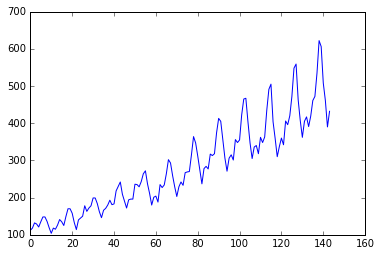

In [3]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('~/Downloads/international-airline-passengers.csv', 
                          usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

## 24.2 Multilayer Perceptron Regression

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


In [5]:
# load the dataset
dataframe = pandas.read_csv('~/Downloads/international-airline-passengers.csv', 
                            usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

print('dataset.shape = ', dataset.shape)
print('dataset[0] = ', dataset[0])

('dataset.shape = ', (144, 1))
('dataset[0] = ', array([ 112.], dtype=float32))


### <img src='http://findicons.com/files/icons/1008/quiet/128/attention2.png' style='height: 16pt; display: inline-block;' /> 주의!

Time series 예측 문제에서는 Training/Test 데이터를 시간 순 - 과거/미래 - 으로 나눠서 생성해야한다.

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('X', 'Y')
for (x,y) in zip(trainX[:10,0], trainY[:10]):
    print(x, y)

('X', 'Y')
(112.0, 118.0)
(118.0, 132.0)
(132.0, 129.0)
(129.0, 121.0)
(121.0, 135.0)
(135.0, 148.0)
(148.0, 148.0)
(148.0, 136.0)
(136.0, 119.0)
(119.0, 104.0)


In [8]:
def buildModel(look_back):
    model = Sequential()
    model.add(Dense(8, input_dim=look_back, activation='relu'))
    model.add(Dense(1))

    return model

model = buildModel(look_back)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 45847.1775
Epoch 2/200
0s - loss: 34864.5199
Epoch 3/200
0s - loss: 26648.3255
Epoch 4/200
0s - loss: 19904.9263
Epoch 5/200
0s - loss: 14022.7023
Epoch 6/200
0s - loss: 9377.1905
Epoch 7/200
0s - loss: 5893.3194
Epoch 8/200
0s - loss: 3533.1099
Epoch 9/200
0s - loss: 2056.3415
Epoch 10/200
0s - loss: 1245.1896
Epoch 11/200
0s - loss: 840.4904
Epoch 12/200
0s - loss: 650.1713
Epoch 13/200
0s - loss: 576.7535
Epoch 14/200
0s - loss: 548.6131
Epoch 15/200
0s - loss: 540.3414
Epoch 16/200
0s - loss: 538.5080
Epoch 17/200
0s - loss: 538.6462
Epoch 18/200
0s - loss: 537.4607
Epoch 19/200
0s - loss: 541.5321
Epoch 20/200
0s - loss: 538.5869
Epoch 21/200
0s - loss: 540.8463
Epoch 22/200
0s - loss: 538.4421
Epoch 23/200
0s - loss: 541.0888
Epoch 24/200
0s - loss: 537.0187
Epoch 25/200
0s - loss: 537.8853
Epoch 26/200
0s - loss: 542.5550
Epoch 27/200
0s - loss: 543.2367
Epoch 28/200
0s - loss: 536.6357
Epoch 29/200
0s - loss: 547.9231
Epoch 30/200
0s - loss: 544.5948
Epoc

In [9]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score:', trainScore)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score:', testScore)

('Train Score:', 531.45190169963428)
('Test Score:', 2353.3514032778535)


In [11]:
def plotPrediction(look_back, model, trainX, testX, dataset):
    # generate predictions for training
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(dataset)
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    

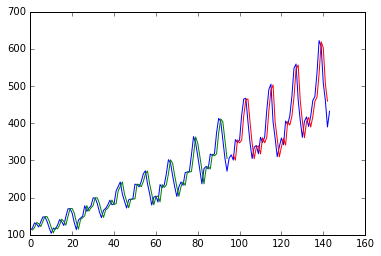

In [12]:
plotPrediction(look_back, model, trainX, testX, dataset)

#trainPredict = model.predict(trainX)
#print('X', 'targY', 'predY')
#for (x,ty,py) in zip(trainX[:10,0], trainY[:10], trainPredict[:10]):
#    print(x, ty,py)

## 22.3 Multilayer Perceptron Using the Window Method

In [13]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('X', 'Y')
for (x,y) in zip(trainX[:10], trainY[:10]):
    print(x, y)

('X', 'Y')
(array([ 112.,  118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.], dtype=float32), 104.0)
(array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,  104.], dtype=float32), 118.0)
(array([ 132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,  104.,  118.], dtype=float32), 115.0)
(array([ 129.,  121.,  135.,  148.,  148.,  136.,  119.,  104.,  118.,  115.], dtype=float32), 126.0)
(array([ 121.,  135.,  148.,  148.,  136.,  119.,  104.,  118.,  115.,  126.], dtype=float32), 141.0)
(array([ 135.,  148.,  148.,  136.,  119.,  104.,  118.,  115.,  126.,  141.], dtype=float32), 135.0)
(array([ 148.,  148.,  136.,  119.,  104.,  118.,  115.,  126.,  141.,  135.], dtype=float32), 125.0)
(array([ 148.,  136.,  119.,  104.,  118.,  115.,  126.,  141.,  135.,  125.], dtype=float32), 149.0)
(array([ 136.,  119.,  104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.], dtype=float32), 170.0)
(array([ 119.,  104.,  118.,  115.,  126.,  141.,  135.,  125.,  149., 

In [14]:
model = buildModel(look_back)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=0)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score:', trainScore)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score:', testScore)

('Train Score:', 312.31146455652572)
('Test Score:', 1271.0050213788006)


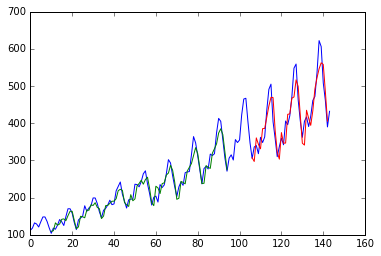

In [15]:
plotPrediction(look_back, model, trainX, testX, dataset)